# Quan hệ phi tuyến giữa các feature và giá (realSum)

<Figure size 1000x600 with 0 Axes>

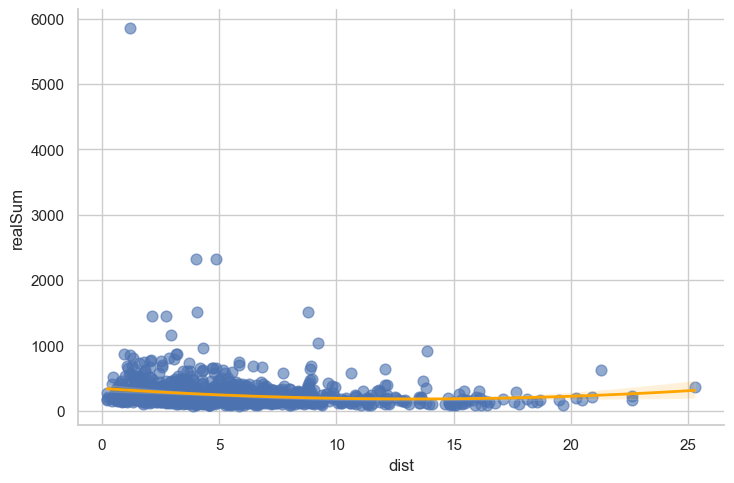

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/berlin_weekends.csv")
plt.figure(figsize=(10, 6))

# sns.scatterplot(
#     data=df,
#     x='dist',
#     y='realSum',
#     hue='room_type',
#     size='attr_index',
#     sizes=(20, 200),
#     alpha=0.7
# )

# plt.title("Mối quan hệ phi tuyến giữa khoảng cách (dist) và giá (realSum)")
# plt.xlabel("Khoảng cách tới trung tâm (dist)")
# plt.ylabel("Giá (realSum)")
# plt.legend(title='Loại phòng', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True, linestyle='--', alpha=0.4)

# plt.show()

sns.lmplot(
    data=df,
    x='dist',
    y='realSum',
    order=2,   # đường cong bậc 2 (parabol)
    aspect=1.5,
    scatter_kws={'alpha': 0.6, 's': 60},
    line_kws={'color': 'orange', 'lw': 2}
)

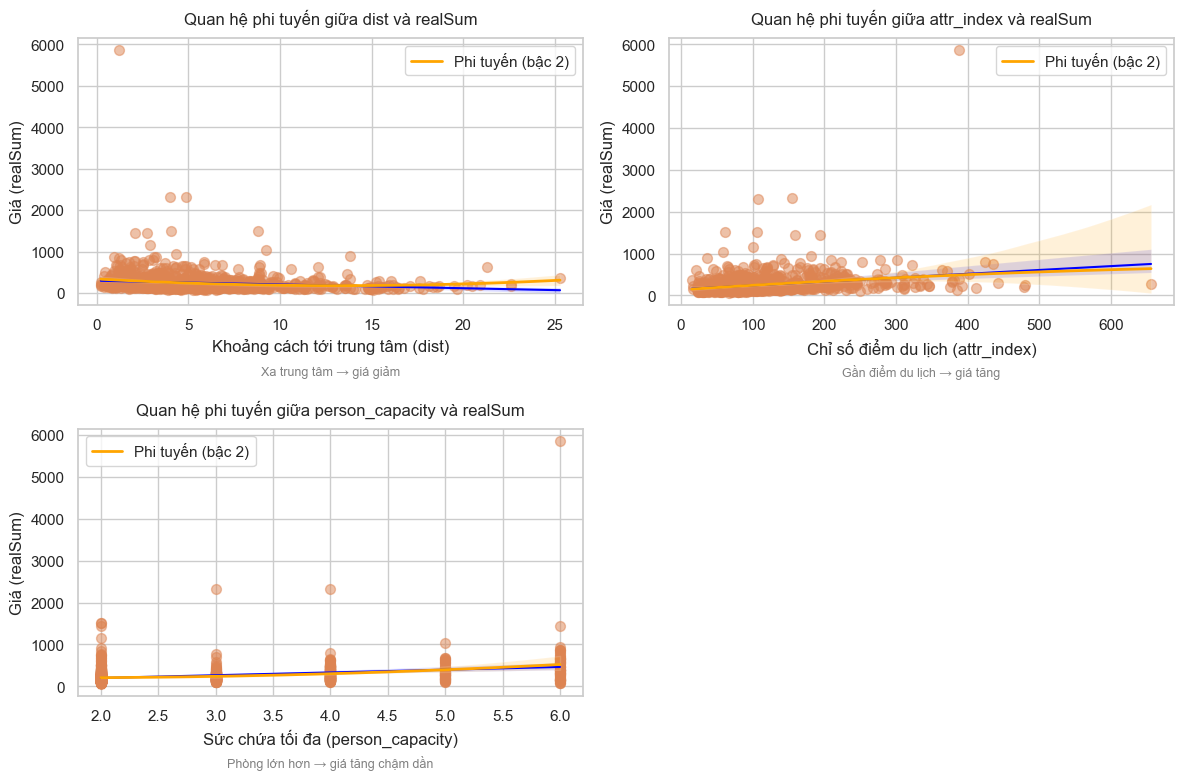

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Các cặp biến có quan hệ phi tuyến rõ
plots = [
    ("dist", "Khoảng cách tới trung tâm (dist)", "Xa trung tâm → giá giảm"),
    ("attr_index", "Chỉ số điểm du lịch (attr_index)", "Gần điểm du lịch → giá tăng"),
    ("person_capacity", "Sức chứa tối đa (person_capacity)", "Phòng lớn hơn → giá tăng chậm dần"),
]

# 2 hàng, 2 cột (để có chỗ trống, biểu đồ rộng hơn)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, (x, xlabel, subtitle) in enumerate(plots):
    # Đường tuyến tính (bậc 1)
    sns.regplot(
        data=df,
        x=x,
        y="realSum",
        order=1,
        ax=axes[i],
        scatter=False,
        line_kws={'color': 'blue', 'lw': 1.5, 'label': 'Tuyến tính (bậc 1)'}
    )

    # Đường phi tuyến (bậc 2)
    sns.regplot(
        data=df,
        x=x,
        y="realSum",
        order=2,
        ax=axes[i],
        scatter_kws={'alpha': 0.5, 's': 50},
        line_kws={'color': 'orange', 'lw': 2, 'label': 'Phi tuyến (bậc 2)'}
    )

    axes[i].set_title(f"Quan hệ phi tuyến giữa {x} và realSum", fontsize=12, pad=10)
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel("Giá (realSum)")
    axes[i].text(
        0.5, -0.25, subtitle,
        ha='center', va='center',
        transform=axes[i].transAxes,
        fontsize=9, color='gray'
    )
    axes[i].legend()

# Ẩn ô trống còn lại (vì chỉ có 3 biểu đồ)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

C:\Users\Phu\AppData\Local\Temp\ipykernel_19704\93011597.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})


=== CART Decision Tree ===
Train R2: 1.0
Test  R2: -0.06468922583663006
Train MSE: 0.0
Test  MSE: 116031.9518954703

=== Linear Regression ===
Train R2: 0.33329060118330545
Test  R2: 0.1983413241404106


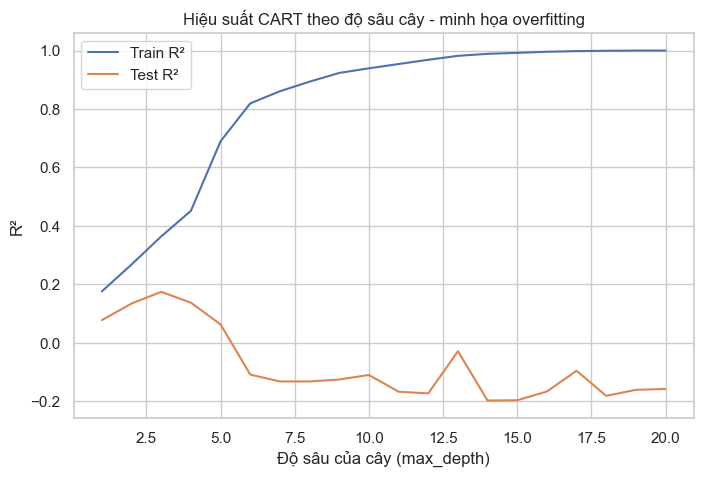

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# --- 2. Tiền xử lý cơ bản ---
# Chuyển boolean TRUE/FALSE về 1/0
df = df.replace({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})

# Loại bỏ cột room_type (categorical)
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

# Tách X, y
X = df.drop(columns=['realSum'])
y = df['realSum']

# --- 3. Chia train/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- 4. CART (Decision Tree Regressor) ---
cart = DecisionTreeRegressor(random_state=42)
cart.fit(X_train, y_train)

# --- 5. Linear Regression (so sánh) ---
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# --- 6. Đánh giá ---
y_train_pred_cart = cart.predict(X_train)
y_test_pred_cart = cart.predict(X_test)

y_train_pred_lin = linreg.predict(X_train)
y_test_pred_lin = linreg.predict(X_test)

print("=== CART Decision Tree ===")
print("Train R2:", r2_score(y_train, y_train_pred_cart))
print("Test  R2:", r2_score(y_test, y_test_pred_cart))
print("Train MSE:", mean_squared_error(y_train, y_train_pred_cart))
print("Test  MSE:", mean_squared_error(y_test, y_test_pred_cart))

print("\n=== Linear Regression ===")
print("Train R2:", r2_score(y_train, y_train_pred_lin))
print("Test  R2:", r2_score(y_test, y_test_pred_lin))

# --- 7. Minh họa overfitting ---
depths = list(range(1, 21))
train_scores, test_scores = [], []

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, label="Train R²")
plt.plot(depths, test_scores, label="Test R²")
plt.xlabel("Độ sâu của cây (max_depth)")
plt.ylabel("R²")
plt.title("Hiệu suất CART theo độ sâu cây - minh họa overfitting")
plt.legend()
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Chuẩn hóa dữ liệu logic
df = df.replace({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

X = df.drop(columns=['realSum'])
y = df['realSum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cart = DecisionTreeRegressor(max_depth=5, random_state=42)
cart.fit(X_train, y_train)

# 🔍 Importance
importances = pd.Series(cart.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(8,4))
importances.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (CART)")
plt.show()


C:\Users\Phu\AppData\Local\Temp\ipykernel_19704\441551512.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'TRUE': 1, 'FALSE': 0, True: 1, False: 0})


KeyError: "None of [Index(['room_type'], dtype='object')] are in the [columns]"

In [14]:
cols_noise = ['multi', 'biz', 'host_is_superhost']

X_reduced = X.drop(columns=cols_noise)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

cart_r = DecisionTreeRegressor(max_depth=5, random_state=42)
cart_r.fit(X_train_r, y_train_r)

print("Before:", cart.score(X_test, y_test))
print("After :", cart_r.score(X_test_r, y_test_r))


Before: -0.06468922583663006
After : 0.0754641118459134
